PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS¶


In [20]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

In [21]:
df=pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [22]:
df1=df.drop(['month','day'],axis=1)
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [23]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [24]:
df1['size_category']=lb.fit_transform(df1['size_category'])

In [25]:
df2=df1.values
df2.shape

(517, 29)

In [26]:
x=df2[:,0:28]
y=df2[:,-1]
x.shape

(517, 28)

In [27]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [28]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [30]:
model.fit(x, y, validation_split=0.33,epochs=100, batch_size=5)

Epoch 1/100
70/70 [==============================] - 2s 10ms/step - loss: 2.3193 - accuracy: 0.6782 - val_loss: 2.1797 - val_accuracy: 0.5497
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 0.9627 - accuracy: 0.6626 - val_loss: 1.1755 - val_accuracy: 0.6901
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 1.1730 - accuracy: 0.7188 - val_loss: 0.7374 - val_accuracy: 0.6725
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 0.5487 - accuracy: 0.8060 - val_loss: 0.9155 - val_accuracy: 0.7778
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 0.4049 - accuracy: 0.8558 - val_loss: 0.7355 - val_accuracy: 0.6608
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 0.3329 - accuracy: 0.8972 - val_loss: 0.5485 - val_accuracy: 0.7310
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 0.2408 - accuracy: 0.8947 - val_loss: 0.5224 - val_accuracy: 0.7544
Epoch 8/100


In [31]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0949 - accuracy: 0.9652
accuracy: 96.52%


The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [56]:
gs=pd.read_csv("gas_turbines.csv")
gs

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [34]:
gs1=gs.values
gs1

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [57]:
X=gs1[:,[0,1,2,3,4,5,6,8,9,10]]
Y=gs1[:,-4]
X

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler=MinMaxScaler()
scaler.fit(x_train)


MinMaxScaler()

In [68]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[-1.53182072e-02, -2.08996080e+01, -4.40409381e-01, ...,
        -2.27018017e+00,  7.12530532e-06, -3.04932831e-01],
       [-1.51554089e-02, -2.08995283e+01, -4.40448350e-01, ...,
        -2.26692897e+00,  5.80370091e-06, -3.04938865e-01],
       [-1.50348875e-02, -2.08995525e+01, -4.40484356e-01, ...,
        -2.27736739e+00,  7.07225483e-05, -3.04950135e-01],
       ...,
       [-1.53686106e-02, -2.08995740e+01, -4.40403080e-01, ...,
        -2.25398187e+00, -8.55365770e-06, -3.04941186e-01],
       [-1.50773855e-02, -2.08996286e+01, -4.40493189e-01, ...,
        -2.28115204e+00,  4.39928881e-05, -3.04946670e-01],
       [-1.53268738e-02, -2.08996782e+01, -4.40430209e-01, ...,
        -2.27006483e+00, -4.94611135e-06, -3.04926107e-01]])

In [72]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# add nodes for prediction
model.add(Dense(1))

In [77]:
model.compile(optimizer='rmsprop',loss='mse')

In [78]:
# Fit the model
model.fit(x_train, y_train, epochs=250)

Epoch 1/250
353/353 [==============================] - 3s 2ms/step - loss: 13209.3097
Epoch 2/250
353/353 [==============================] - 1s 2ms/step - loss: 255.3024
Epoch 3/250
353/353 [==============================] - 1s 2ms/step - loss: 261.2177
Epoch 4/250
353/353 [==============================] - 1s 2ms/step - loss: 259.2586
Epoch 5/250
353/353 [==============================] - 1s 2ms/step - loss: 262.7736
Epoch 6/250
353/353 [==============================] - 1s 2ms/step - loss: 248.8115
Epoch 7/250
353/353 [==============================] - 1s 2ms/step - loss: 254.9711
Epoch 8/250
353/353 [==============================] - 1s 2ms/step - loss: 253.6602
Epoch 9/250
353/353 [==============================] - 1s 2ms/step - loss: 256.1399
Epoch 10/250
353/353 [==============================] - 1s 2ms/step - loss: 256.3066
Epoch 11/250
353/353 [==============================] - 1s 2ms/step - loss: 255.5144
Epoch 12/250
353/353 [==============================] - 1s 2ms/step - lo

<AxesSubplot:>

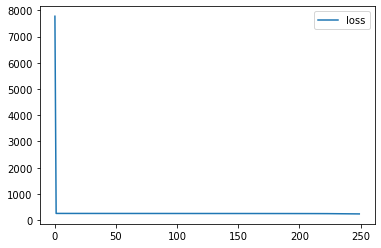

In [81]:
%matplotlib inline
import matplotlib as plot
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [83]:
pred = model.predict(x_test)
pred

array([[135.07776],
       [135.39783],
       [134.20406],
       ...,
       [136.38391],
       [134.45956],
       [135.06517]], dtype=float32)

In [84]:
pred = pred.ravel()

In [86]:
test_score = model.evaluate(x_test,y_test,verbose=0)
test_score

224.51783752441406

In [87]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [88]:
mean_absolute_error(pred,y_test)

10.757188878160841

In [89]:
mean_squared_error(pred,y_test)

224.5178538304452

In [90]:
import matplotlib.pyplot as plt

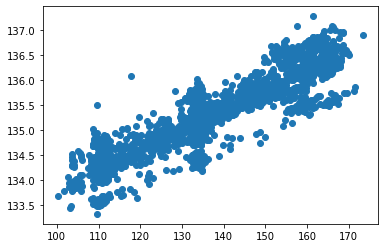

In [91]:
plt.scatter(y_test,pred)